In [30]:
#DL：基于HNN将凌乱数字矩阵图像(模拟手写数字图片)实现转为最相近的阿拉伯数字
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt

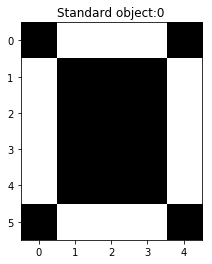

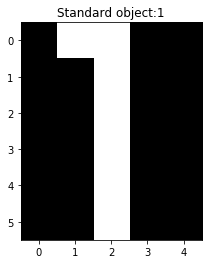

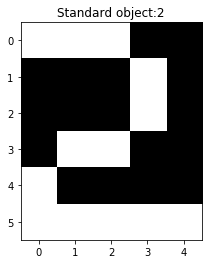

In [31]:
# 012数字形矩阵————————16*8改为6*5
target=np.array([[0, 1, 1, 1, 0,
                 1, 0, 0, 0, 1,
                 1, 0, 0, 0, 1,
                 1, 0, 0, 0, 1,
                 1, 0, 0, 0, 1,
                 0, 1, 1, 1, 0],
                 
                 [0, 1, 1, 0, 0,
                  0, 0, 1, 0, 0,
                  0, 0, 1, 0, 0,
                  0, 0, 1, 0, 0,
                  0, 0, 1, 0, 0,
                  0, 0, 1, 0, 0],
                 
                 [1, 1, 1, 0, 0,
                  0, 0, 0, 1, 0,
                  0, 0, 0, 1, 0,
                  0, 1, 1, 0, 0,
                  1, 0, 0, 0, 0,
                  1, 1, 1, 1, 1]])
#绘制
def visualized(data, title): 
    fig,ax=plt.subplots() 
    ax.imshow(data, cmap=plt.cm.gray,interpolation='nearest') #nearest即临近的两点插值法
    ax.set_title(title) 
    plt.show() 
#HNN中定义的吸引值就是显示的这三张黑白数字图片0、1、2
for i in range(len(target)): 
    visualized(np.reshape(target[i],(6,5)),"Standard object:"+str(i))


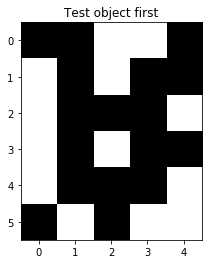

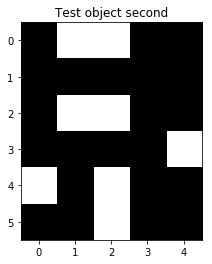

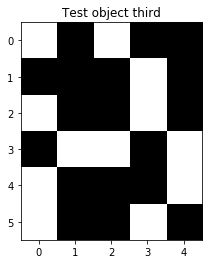

In [32]:
#hopfield网络值是1和-1
target[target==0]=-1       #将target矩阵内所有0变为-1
HNN=nl.net.newhop(target)  #调用已有的hopfield神经网络，吸引子为target即先前定义好的012数字形矩阵—

#定义三个测试数据
test_data0=np.asfarray([0, 0, 1, 1, 0,
                        1, 0, 1, 0, 0,
                        1, 0, 0, 0, 1,
                        1, 0, 1, 0, 0,
                        1, 0, 0, 0, 1,
                        0, 1, 0, 1, 1])
test_data1=np.asfarray([0, 1, 1, 0, 0,
                        0, 0, 0, 0, 0,
                        0, 1, 1, 0, 0,
                        0, 0, 0, 0, 1,
                        1, 0, 1, 0, 0,
                        0, 0, 1, 0, 0])
test_data2=np.asfarray([1, 0, 1, 0, 0,
                        0, 0, 0, 1, 0,
                        1, 0, 0, 1, 0,
                        0, 1, 1, 0, 1,
                        1, 0, 0, 0, 1,
                        1, 0, 0, 1, 0])

#显示测试数据集,有时候会掉入伪限制里面出不来即不能识别数字
visualized(np.reshape(test_data0,(6,5)),"Test object first")
visualized(np.reshape(test_data1,(6,5)),"Test object second")
visualized(np.reshape(test_data2,(6,5)),"Test object third")

test_data is: 0


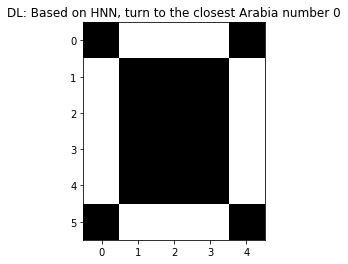

test_data is: 1


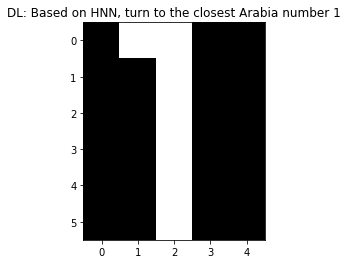

test_data is: 2


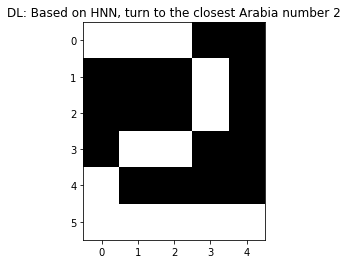

In [35]:
test_data0[test_data0==0]=-1        #将test_data0矩阵内所有0变为-1
out0=HNN.sim([test_data0])          #测试数据集输入到hopfield网络得到输出
for i in range(len(target)):        #判断测试集数字是多少
    if((out0==target[i]).all()):    #测试集与训练集比较，如果完全等于则输出
       print("test_data is:",i)
visualized(np.reshape(out0,(6,5)),"DL: Based on HNN, turn to the closest Arabia number 0") #显示输出


test_data1[test_data1==0]=-1 
out1=HNN.sim([test_data1]) 
for i in range(len(target)):  
    if((out1==target[i]).all()):
       print("test_data is:",i)
visualized(np.reshape(out1,(6,5)),"DL: Based on HNN, turn to the closest Arabia number 1") 

test_data2[test_data2==0]=-1 
out2=HNN.sim([test_data2]) 
for i in range(len(target)):  
    if((out2==target[i]).all()):
       print("test_data is:",i)
visualized(np.reshape(out2,(6,5)),"DL: Based on HNN, turn to the closest Arabia number 2") 